# Sistemas LTI continuos y discretos

In [1]:
from scipy import signal

## Ejemplo: creamos un sistema LTI con la siguiente funcion de transferencia:
$$ H(s) = \frac{5}{(s+3)(s-4)} = \frac{5}{s^2-s-12}$$

In [12]:
zpk_con = signal.ZerosPolesGain([], [-3, 4], 5)
print(zpk_con)

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-3,  4]),
5,
dt: None
)


In [16]:
tfsys = signal.zpk2tf([], [-3, 4], 5)
print(tfsys)

(array([5.]), array([  1.,  -1., -12.]))


In [17]:
tfsys2 = zpk_con.to_tf()
print(tfsys2)

TransferFunctionContinuous(
array([5.]),
array([  1.,  -1., -12.]),
dt: None
)


A partir de el sistema continuo se construyen los sistemas discretos usando un retenedor de orden cero (ZOH). Se emplean los tiempos de muestreo 0.1s y 0.5s.

In [18]:
dt = 0.1
dt2 = 0.5
zpk_dis = zpk_con.to_discrete(dt)
zpk_dis2 = zpk_con.to_discrete(dt2)
print(zpk_dis)
print(zpk_dis2)

ZerosPolesGainDiscrete(
array([-1.03375533]),
array([1.4918247 , 0.74081822]),
0.02611589140777859,
dt: 0.1
)
ZerosPolesGainDiscrete(
array([-1.16344507]),
array([7.3890561 , 0.22313016]),
0.9559338653205769,
dt: 0.5
)


/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


## Graficas de las respuestas al escalon para cada sistema

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
t = np.linspace(0,4,1000)
td, yd = signal.dstep(zpk_dis, t=t)
td2, yd2 = signal.dstep(zpk_dis2, t=t)
_, yc = signal.step(zpk_con,T=t)


Text(0, 0.5, 'Amplitude')

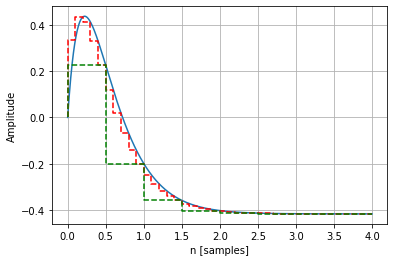

In [6]:
plt.plot(t, yc)
plt.step(td, np.squeeze(yd),'--r')
plt.step(td2, np.squeeze(yd2),'--g')
plt.grid()
plt.xlabel('n [samples]')
plt.ylabel('Amplitude')

# Ejercicios: Analizar los polos y ceros (continuos y discretos) de los siguientes sistemas LTI e indicar si son estables

## 1) Cual es el sistema discreto para $T=0.5$, si $$ H(s) = \frac{1}{s^2+s+1} $$

In [7]:
#TODO

## 2)  Determinar las ecuaciones en diferencia para $T=0.1$, si $$ H(s) = \frac{1}{(s-2)(s-3)} $$

In [8]:
#TODO

## 3) Encontrar el modelo de espacios discreto si T=0.1 y
$$ H[z] = \frac{1}{z^2-3z+1} $$ 
Usar [scipy.signal.dlti](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.html)

In [9]:
#TODO definir la funcion de transferencia discetro

Determinar los ceros, polos y la ganancia

In [10]:
#TODO convertir la funcion de transferencia a ZPK